[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


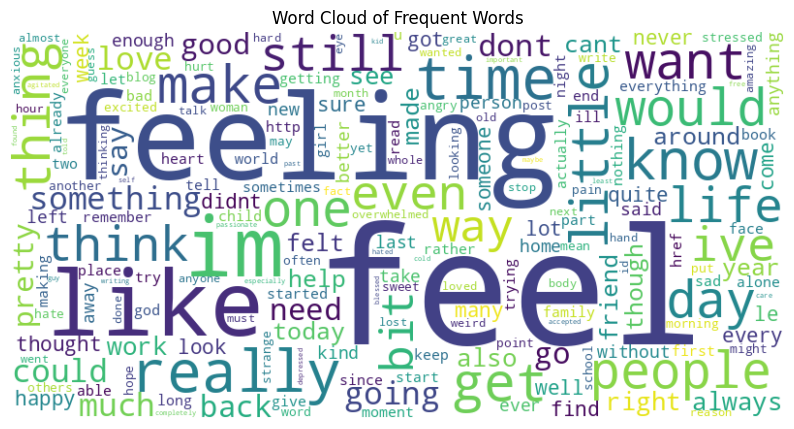

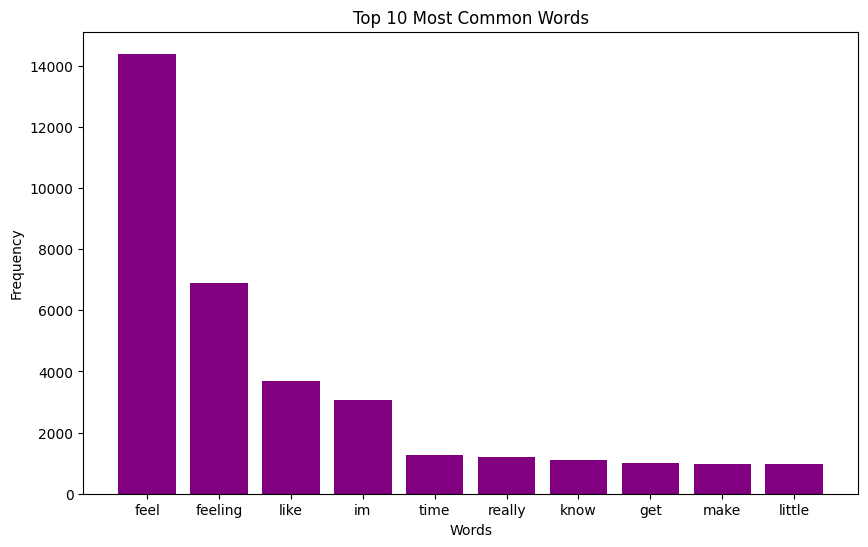

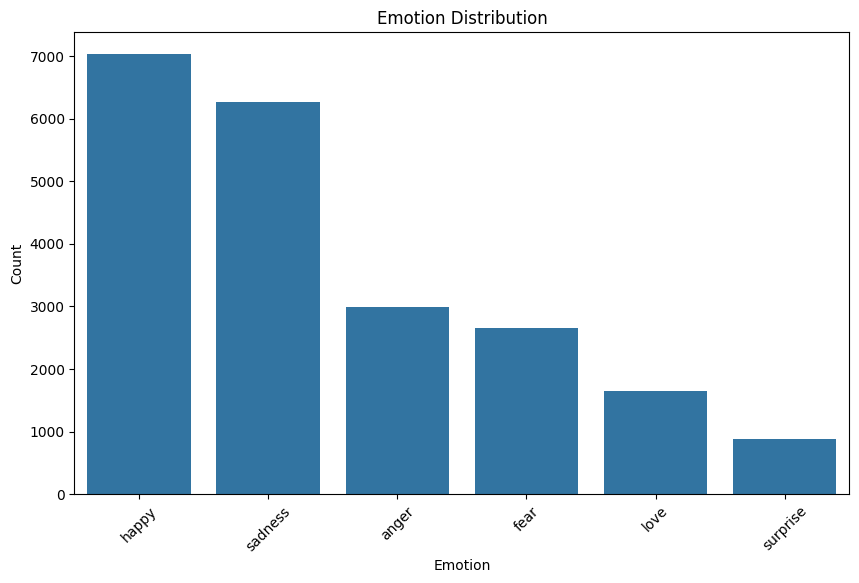


Naive Bayes Model - Accuracy: 0.78
              precision    recall  f1-score   support

       anger       0.89      0.68      0.77       617
        fear       0.82      0.63      0.71       531
       happy       0.76      0.94      0.84      1381
        love       0.81      0.33      0.47       318
     sadness       0.77      0.93      0.84      1277
    surprise       0.80      0.17      0.28       168

    accuracy                           0.78      4292
   macro avg       0.81      0.61      0.65      4292
weighted avg       0.79      0.78      0.76      4292


Logistic Regression Model - Accuracy: 0.89
              precision    recall  f1-score   support

       anger       0.91      0.85      0.88       617
        fear       0.87      0.85      0.86       531
       happy       0.91      0.93      0.92      1381
        love       0.82      0.80      0.81       318
     sadness       0.91      0.94      0.92      1277
    surprise       0.77      0.74      0.75       16

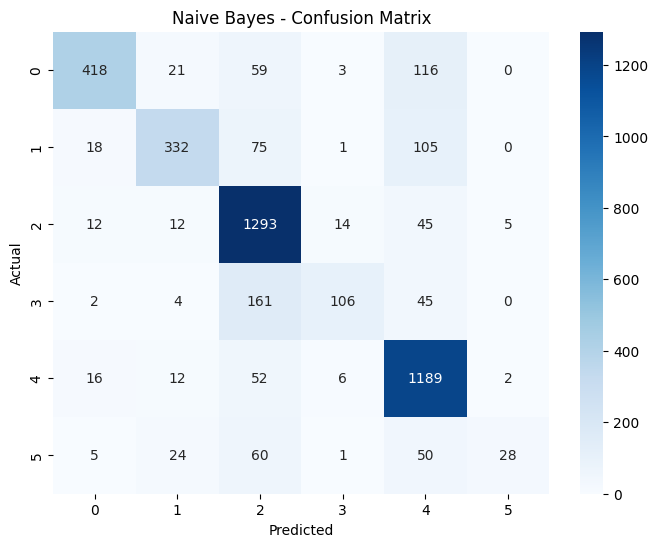

In [1]:
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Read the CSV file
try:
    df = pd.read_csv("Emotion_final.csv")
except FileNotFoundError:
    print("Error: 'Emotion_final.csv' not found.")
    df = pd.DataFrame()

# Check if the DataFrame is loaded properly
if not df.empty:
    # Display first few rows to verify
    print(df.head())

    # Clean and preprocess text data
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    def clean_text(text):
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        words = text.split()
        return ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    # Apply text cleaning
    df['cleaned_text'] = df['Text'].apply(clean_text)

    # EDA - Word Frequency Analysis
    all_words = ' '.join(df['cleaned_text']).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)

    # Word Cloud Visualization
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Frequent Words')
    plt.show()

    # Bar Chart for Top 10 Most Common Words
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='purple')
    plt.title("Top 10 Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

    # Bar Chart of Emotion Counts
    emotion_counts = df['Emotion'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
    plt.title('Emotion Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Vectorization using Count Vectorizer
    vectorizer = CountVectorizer()
    X_count = vectorizer.fit_transform(df['cleaned_text'])
    y = df['Emotion']

    # Split data
    X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

    # Model Training and Evaluation
    # Naive Bayes
    model_nb = MultinomialNB()
    model_nb.fit(X_train_count, y_train)
    y_pred_nb = model_nb.predict(X_test_count)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    report_nb = classification_report(y_test, y_pred_nb)
    print(f"\nNaive Bayes Model - Accuracy: {accuracy_nb:.2f}\n{report_nb}")

    # Logistic Regression
    model_lr = LogisticRegression(max_iter=200)
    model_lr.fit(X_train_count, y_train)
    y_pred_lr = model_lr.predict(X_test_count)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    report_lr = classification_report(y_test, y_pred_lr)
    print(f"\nLogistic Regression Model - Accuracy: {accuracy_lr:.2f}\n{report_lr}")

    # Support Vector Machine
    model_svm = SVC()
    model_svm.fit(X_train_count, y_train)
    y_pred_svm = model_svm.predict(X_test_count)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    report_svm = classification_report(y_test, y_pred_svm)
    print(f"\nSupport Vector Machine Model - Accuracy: {accuracy_svm:.2f}\n{report_svm}")

    # Confusion Matrix for Naive Bayes
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
    plt.title("Naive Bayes - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

else:
    print("No data available in the CSV file for analysis.")
